## Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_curve,auc,log_loss,ConfusionMatrixDisplay
from sklearn.preprocessing  import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from mixed_naive_bayes import MixedNB
import warnings 
warnings.filterwarnings('ignore')

## Importing the Data

Sl_no.: Candidate serial number
Gender: Gender of the candidate
Ssc_p: Percentage of marks in Secondary Education/ 10th
ssc_b: Board of Secondary education - Central/Others
Hsc_p:  Percentage of marks in Higher Secondary Education/ 12th
hsc_b: Board of Higher Secondary Education - Central/Others
hsc_s: Specialization in Higher Secondary Education/12th
Degree_p:  Percentage of marks in Degree
Degree_t: Undergraduation type/ Field of degree education
workex: Any previous experience
Etest_p: Employability test percentage
specialisation: Post Graduation(MBA) specialization
Mba_p: Percentage of marks in MBA
Status: Candidate placed or not, Target variable
Salary: If placed, what is the salary offered by the company to the candidate


In [2]:
df = pd.read_csv('Placement_Data.csv')

In [3]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [5]:
#df.corr()

In [6]:
df.drop(columns=['sl_no','salary'],axis=1,inplace=True)

In [7]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
numerical_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

In [10]:
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)

IQR = Q3 - Q1

outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).sum()
print(outliers)

ssc_p       0
hsc_p       8
degree_p    1
etest_p     0
mba_p       0
dtype: int64


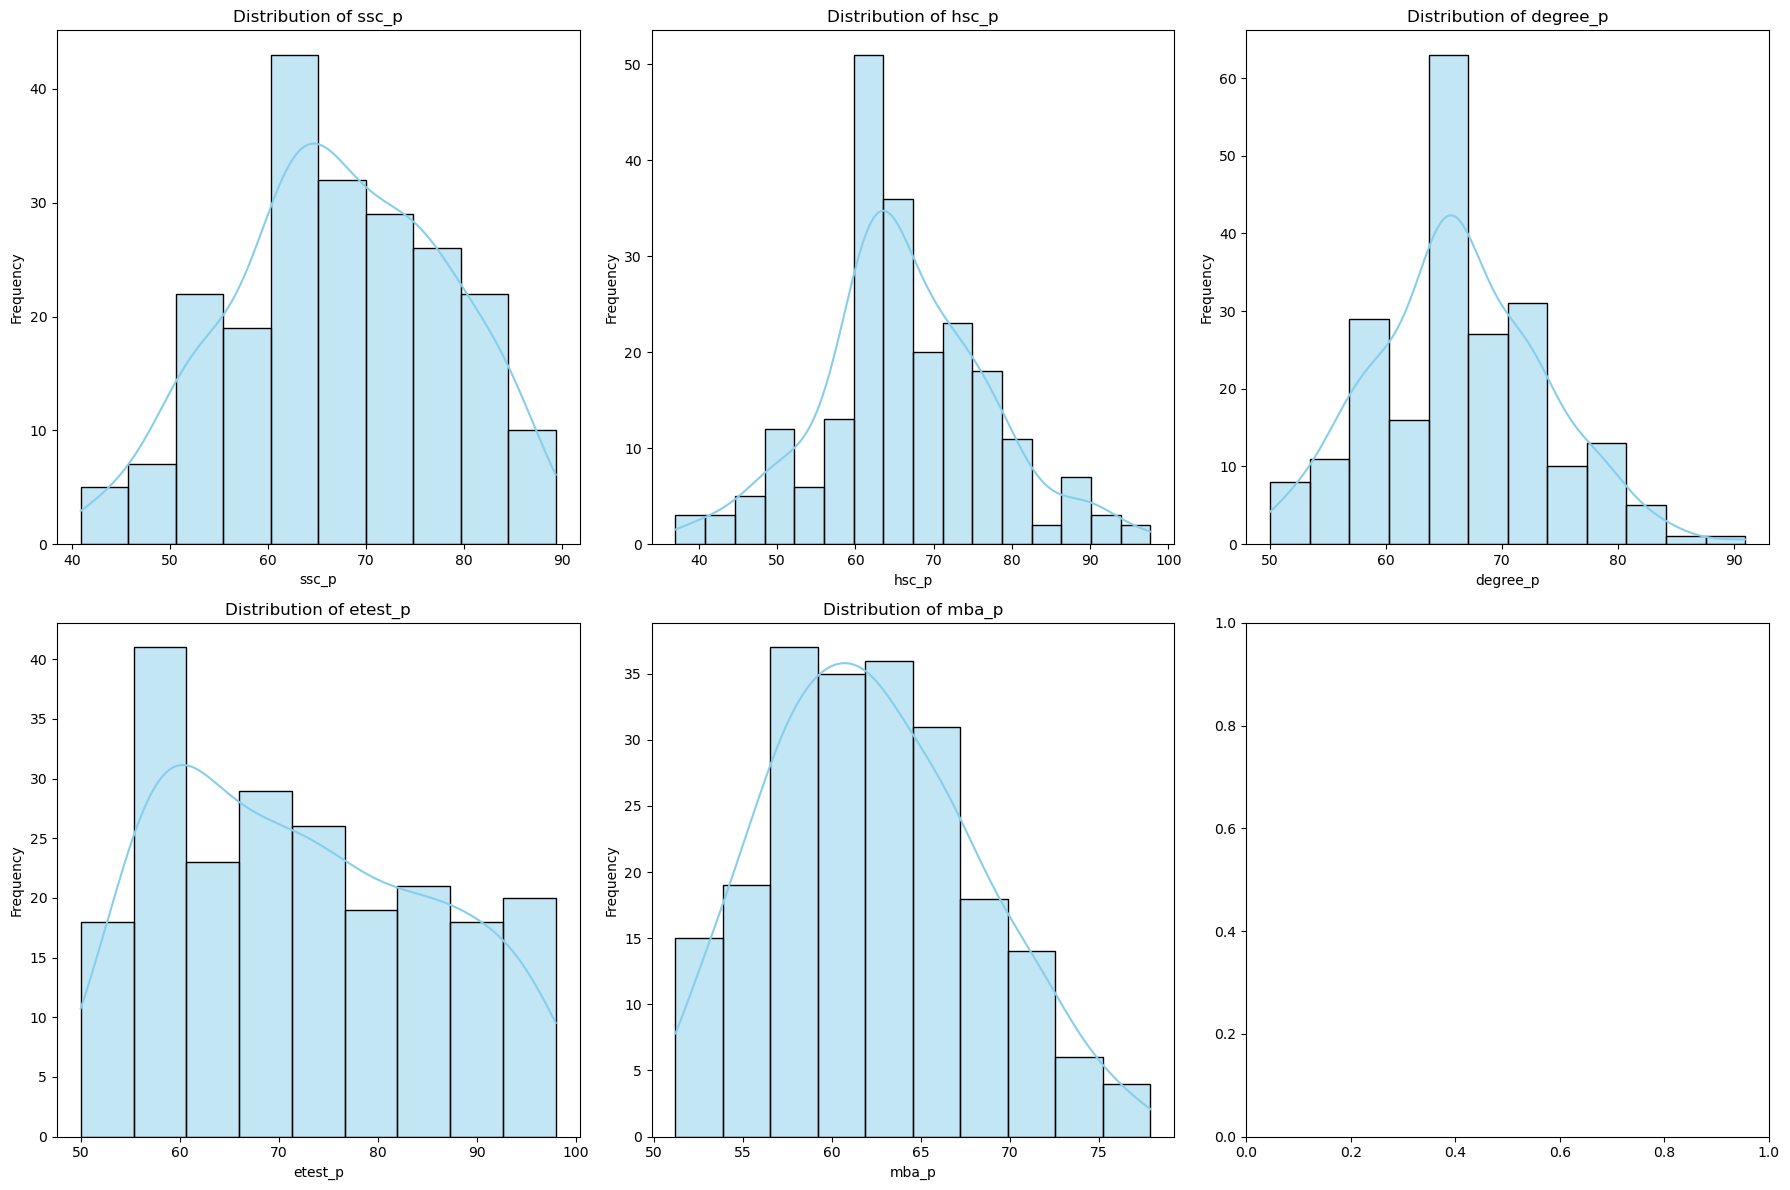

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, color='skyblue', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {feature}')
    axes[i//3, i%3].set_xlabel(feature)
    axes[i//3, i%3].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


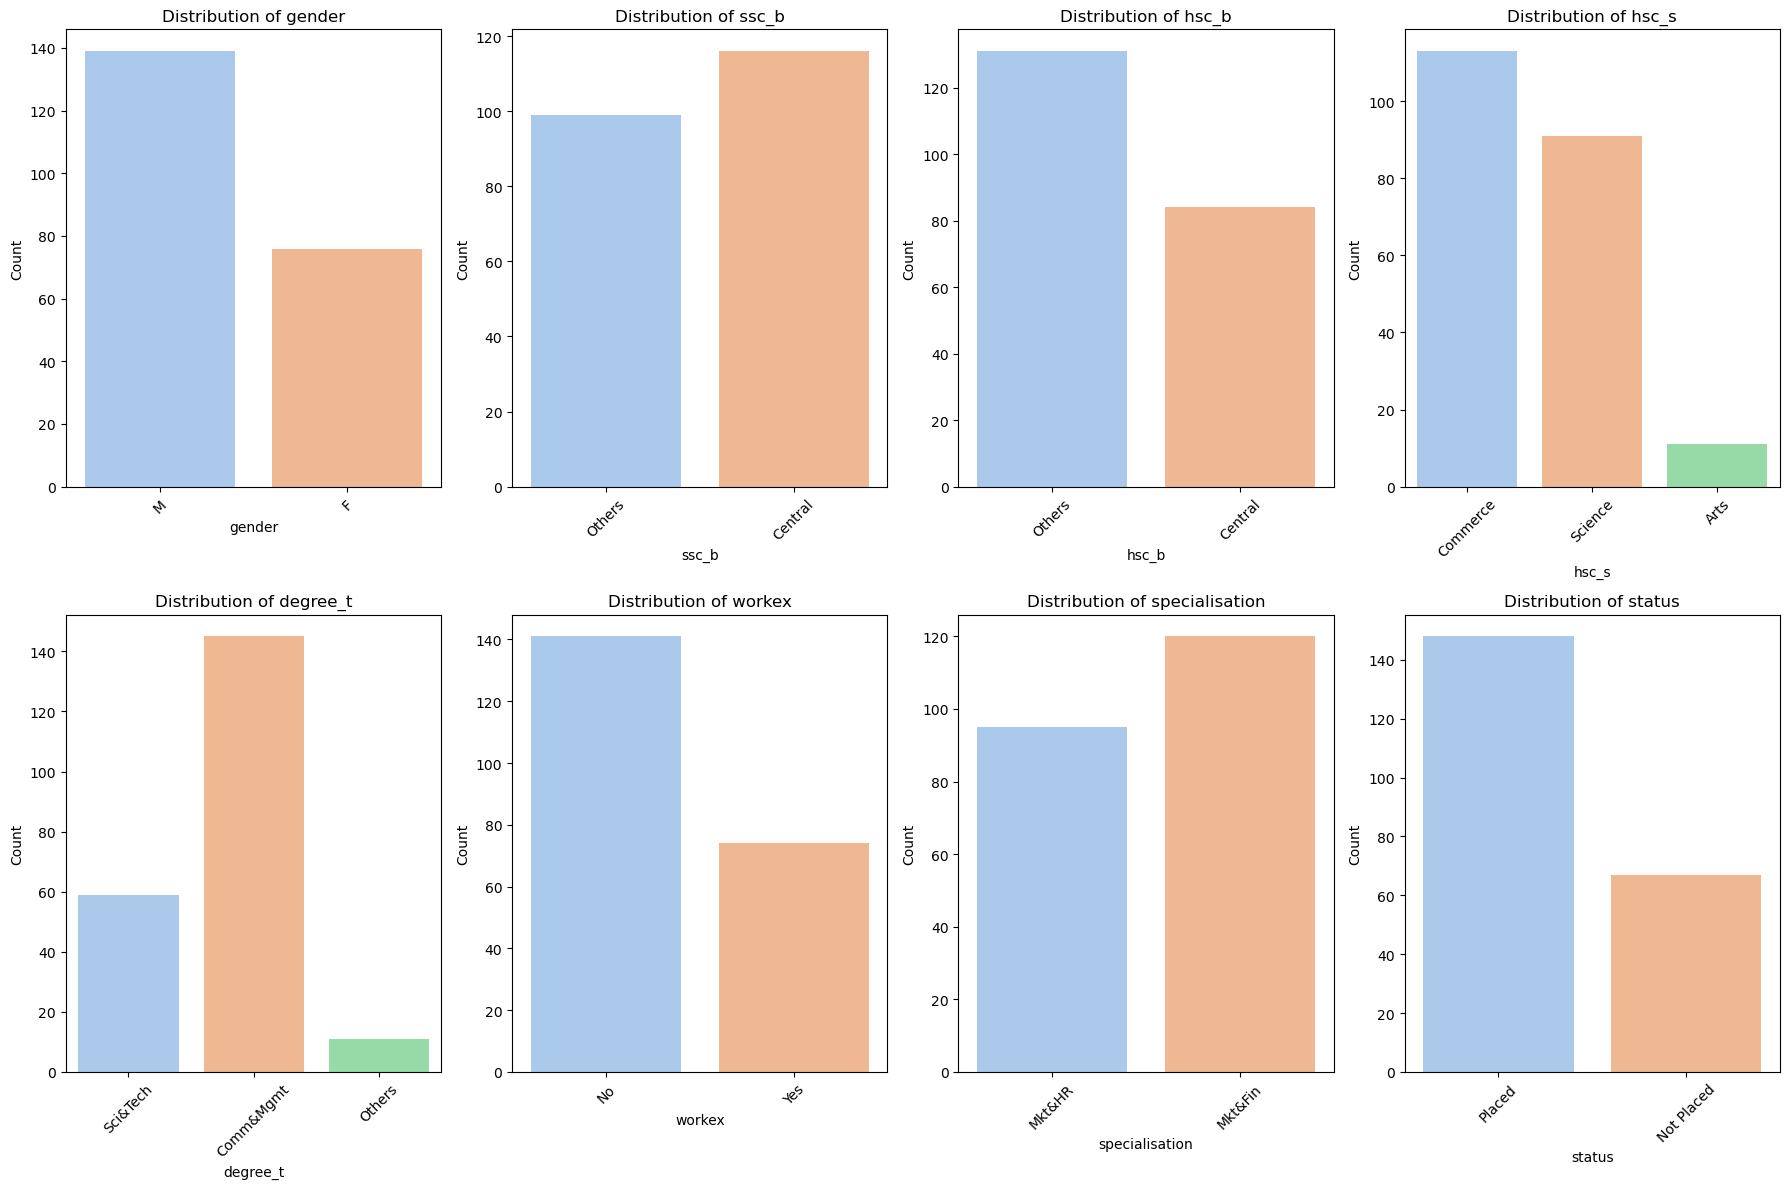

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))
for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, palette='pastel', ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'Distribution of {feature}')
    axes[i//4, i%4].set_xlabel(feature)
    axes[i//4, i%4].set_ylabel('Count')
    axes[i//4, i%4].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

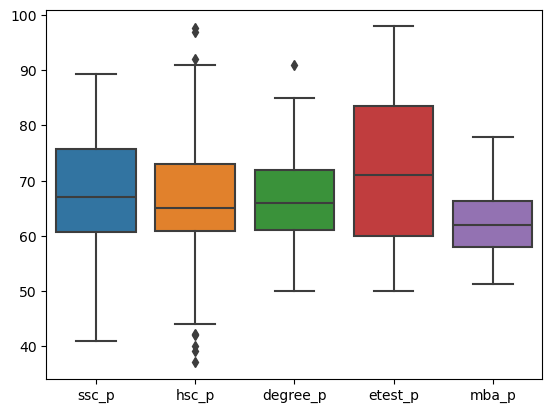

In [13]:
sns.boxplot(data=df)

## Splitting the Data

In [14]:
X = df.drop('status',axis=1)
y = df['status']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X.select_dtypes(include='number').columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], dtype='object')

In [17]:
X.select_dtypes(include='object').columns

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation'],
      dtype='object')

In [18]:
X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23


In [19]:
X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23


In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_features = X.select_dtypes(include='number').columns
numerical_transformer = SimpleImputer(strategy='mean')

categorical_features = X.select_dtypes(include='object').columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features),
                 ('num',numerical_transformer,numerical_features)])

estimator = MultinomialNB()

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', estimator)
])

pipeline.fit(X_train, y_train)

y_pred_test = pipeline.predict(X_test)


In [21]:
accuracy_score(y_test,y_pred_test)

0.8604651162790697

In [22]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

  Not Placed       0.80      0.67      0.73        12
      Placed       0.88      0.94      0.91        31

    accuracy                           0.86        43
   macro avg       0.84      0.80      0.82        43
weighted avg       0.86      0.86      0.86        43



In [23]:
import pickle
pickle.dump(pipeline,open("campus.pkl","wb"))

In [24]:
X_test.iloc[0].tolist()

['M',
 69.0,
 'Others',
 60.0,
 'Others',
 'Commerce',
 65.0,
 'Comm&Mgmt',
 'No',
 87.55,
 'Mkt&Fin',
 52.81]

In [25]:
predict = pickle.load(open("campus.pkl","rb"))

In [26]:
sample_row = X_test.iloc[0]
sample_row_df = pd.DataFrame([sample_row])
predict.predict(sample_row_df)[0]

'Placed'

In [27]:
sample_row

gender                    M
ssc_p                  69.0
ssc_b                Others
hsc_p                  60.0
hsc_b                Others
hsc_s              Commerce
degree_p               65.0
degree_t          Comm&Mgmt
workex                   No
etest_p               87.55
specialisation      Mkt&Fin
mba_p                 52.81
Name: 200, dtype: object

In [28]:
X_test.iloc[4].tolist()

['F',
 65.0,
 'Central',
 75.0,
 'Central',
 'Commerce',
 69.0,
 'Comm&Mgmt',
 'Yes',
 72.0,
 'Mkt&Fin',
 64.66]